In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import pandas as pd
# import numpy as np

# # Read the CSV file of 21th person's low MWL data
# df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv')
# display(df)    # 2nd person's low mwl data

Sample input signal

In [3]:
# # A person's low mental workload data

# # Extract required gsr values
# gsr_1 =df['Trial 1:0back']
          
# gsr_2 = df['Trial 6:0back']


          

In [4]:
# # set sampling rate of gsr data to be 256 Hz
          
# sampling_rate=256

# # create a time array based on sampling rate and length of gsr values

# time=np.arange(len(gsr_1))/sampling_rate

# # plot the gsr values against time
# fig, axes = plt.subplots(2, figsize=(12,12))

# # top panel shows the input signal
# ax=axes[0]
# ax.plot(time,gsr_1)
# ax.set_ylabel('Amplitude')
# ax.set_title('GSR')

# ax=axes[1]
# ax.plot(time, gsr_2)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')



**Consider set 1 as first 768 rows of data**

In [5]:
# set1=df.iloc[0:768]
# set1

In [6]:
# # Read the CSV file of 21th person's high MWL data
# df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv')
# display(df)    # 2nd person's low mwl data

In [7]:
# # A person's high mental workload data

# # Extract required gsr values
# gsr_1_h =df['Trial 3:3back']
          
# gsr_2_h = df['Trial 5:3back']

# # plot the gsr values against time
# fig, axes = plt.subplots(2, figsize=(12,12))

# # top panel shows the input signal
# ax=axes[0]
# ax.plot(time,gsr_1_h)
# ax.set_ylabel('Amplitude')
# ax.set_title('GSR')

# ax=axes[1]
# ax.plot(time, gsr_2_h)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')


In [8]:
# # Read the CSV file of 8th person's high MWL data
# df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv')
# display(df)    # 8th person's high mwl data




In [9]:
# # A person's high mental workload data

# # Extract required gsr values
# gsr_8_h =df['Trial 3:3back']
          
# gsr_8_h = df['Trial 5:3back']

# # plot the gsr values against time
# fig, axes = plt.subplots(2, figsize=(12,12))

# # top panel shows the input signal
# ax=axes[0]
# ax.plot(time,gsr_8_h)
# ax.set_ylabel('Amplitude')
# ax.set_title('GSR')

# ax=axes[1]
# ax.plot(time, gsr_8_h)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')

 
#  Feature Extraction Method From Research Paper: Toward Dynamically Adaptive Simulation Multimodal
 
 Feature                                   Description

 RT           =            Rise time from SCR onset to peak response
 
 
 
 HRT         =             Half recovery time of the SCR peak
 
 
 Amp            =          Amplitude of the skin conductance response at its peak   
 
 Area       =              Area of the skin conductance response
 
 Prom        =             Prominence of skin conductance response relative to the skin conductance level            
 
 SCL         =             Skin conductance level, the average electrodermal response          
 
 MAV1Diff SCL    =            First derivative of the mean absolute value of the skin conductance level
 
 MAV2Diff SCL    =         Second derivative of the mean absolute value of the skin conductance level
 
 BP             =          Band power power of the GSR signal
 
 PSD       =              Power spectrum density estimate of the GSR signal
 
 
 


Compute and extract the above features and label whether there is high or low mental workload

- correlate to stress 
- low mental workload would indicate that there is a coping mechanism

# Computing features

In [10]:
from scipy.signal import find_peaks

Feature Extraction Method: Continous Wavelet Transform 

- time frequency : info on how GSR signal evolves over time
- multi scale analysis: detect both short term & long term changes in skin conductance
- capture transient events : such as sudden changes due to stress level

use PyWavelets to compute CWT

use CWT coefficients to extract features

for each entry of csv (person)

------------------ energy per scale  | entropy | band power | dominantfrequency | 


p1: 

p2: 

...

In [11]:
# # import pandas as pd
# # import numpy as np
# # # Loading the CSV file
# # df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv')
# # display(df)    # 2nd person's low mwl data

# display(df) # 2nd person's low mwl data

**Consider set 1 as first 768 rows of the data**

In [12]:
# sc_X = StandardScaler()
# X = sc_X.fit_transform(set1) # gives an array of preprocessed values

# X

In [13]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt

# set1=df.iloc[0:768]
# set1



**Applying preprocessing as standard scaling**

In [14]:
# X.shape # checking shape of array

In [15]:
# xdf=pd.DataFrame(X) # converting array into dataframe

# xdf[0] # scaledvalues of column 1

In [16]:
# sampling_rate = 256 
# signal=xdf[0].values

# t=np.arange(len(signal))/sampling_rate

In [17]:
# s = set1[['Trial 1:0back']].values
# fig, axes = plt.subplots(2, figsize = (12, 12))

# # input signal vs preprocessed signal

# ax=axes[0]
# ax.plot(t,s)
# ax.set_ylabel('Amplitude')
# ax.set_title('Input GSR')

# ax = axes[1]
# ax.plot(t, signal)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')
# ax.set_title('Preprocessed GSR')

# **Continuous Wavelet Transform (CWT)**

CWT to analyze both time and frequency characteristics of signals simultaneously

- Involves scaling and translating a wavelet function across the signal to capture different frequency components at various time scales

- Result is a time-frequency representation known as scalogram for tasks like signal denoising, feature extraction, and pattern recognition

- CWT is advantageous for continuous analysis capability but can be computationally intensive compared to the Discrete Wavelet Transform (DWT)


In [18]:
import pywt

In [19]:
wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

Normally used(supported) wavelets:

* Mexican Hat (mexh),
* Morlet (morl),
* Complex Morlet (cmorB-C),
* Gaussian Derivative (gausP),
* Complex Gaussian Derivative (cgauP)
* Shannon (shanB-C),
* Frequency B-Spline (fbspB-C)

In [20]:
# l = len(signal)
# wavelet = 'morl'

# # calculate nyquist frequency (nf)
# nyquist_freq = sampling_rate /2
# # although min scale is taken as 1/nf
# # it is too small here and so 
# mins =1
# maxs=270
# scales=np.arange(mins,maxs+1)

# '''
# CWT using Python wavelet module (pywt)
# - signal: input signal (array)
# - scales: scales to be used for CWT (array)
# - wavelet: name of wavelet used (string)

# - Other parameters:
# - method: {'conv' , 'fft'} (optional)
# - sampling_period: seconds for output freqs (float) (optional)
# - axis: a number (int) (optional)

# '''

# coef , freqs = pywt.cwt(signal , scales,wavelet)

# # coef : CWT coefficients (array)
# # freqs : frequencies corresponding to scales (array)


In [21]:
# coef.shape

In [22]:
# freqs.shape

**Visualizing CWT**

In [23]:
# PLOTTING SCALOGRAM



# Merge CSV files (old method)

In [24]:
# # merging twenty two csv files of Low workload
# low_data = pd.concat(
#     map(pd.read_csv, ['/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p3l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p4l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p5l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p6l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p8l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p10l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p11l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p12l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p13l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p14l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p15l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p16l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p17l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p18l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p19l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p20l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p21l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p22l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p23l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p24l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p25l.csv']), ignore_index=True)

# # merging twenty two csv files of High workload
# high_data = pd.concat(
#     map(pd.read_csv, ['/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p2h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p3h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p4h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p5h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p6h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p8h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p11h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p12h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p13h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p14h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p15h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p16h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p17h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p18h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p19h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p20h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p21h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p22h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p23h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p24h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p25h.csv']), ignore_index=True)

# # Saving combo dataframes as csv files for later application
# gsr_high_data = low_data.to_csv('GSR_high.csv', index = True)
# gsr_low_data = high_data.to_csv('GSR_low.csv', index = True)

# Merge CSV files (NEW method)

**11 persons for LOW MWL combined into 1 dataframe OR CSV**

**11 persons for HIGH MWL combines into 1 dataframe OR CSV**

In [25]:
import os
import pandas as pd

# Define the directories for Low and High workload data
low_mwl_dir = '/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/'
high_mwl_dir = '/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/'

# Get list of files in Low_MWL directory, filter only '.csv' files, and sort them
low_mwl_files = sorted([os.path.join(low_mwl_dir, f) for f in os.listdir(low_mwl_dir) if f.endswith('.csv')])[:11]

# Get list of files in High_MWL directory, filter only '.csv' files, and sort them
high_mwl_files = sorted([os.path.join(high_mwl_dir, f) for f in os.listdir(high_mwl_dir) if f.endswith('.csv')])[:11]

# Merging first 11 CSV files of Low workload
low_data = pd.concat(map(pd.read_csv, low_mwl_files), ignore_index=True)

# Merging first 11 CSV files of High workload
high_data = pd.concat(map(pd.read_csv, high_mwl_files), ignore_index=True)

# Output the first few rows to confirm the data
print("Low workload data:")
print(low_data.head())

print("\nHigh workload data:")
print(high_data.head())


Low workload data:
   Trial 1:0back  Trial 6:0back
0          0.632          5.097
1          0.633          5.097
2          0.633          5.096
3          0.633          5.095
4          0.633          5.095

High workload data:
   Trial 3:3back  Trial 5:3back
0          2.403          4.060
1          2.403          4.060
2          2.403          4.061
3          2.403          4.062
4          2.403          4.063


In [26]:
# low mental workload data

display(low_data)

,Trial 1:0back,Trial 6:0back
0,0.632,5.097
1,0.633,5.097
2,0.633,5.096
3,0.633,5.095
4,0.633,5.095
...,...,...
844795,1.946,2.251
844796,1.946,2.251
844797,1.946,2.251
844798,1.946,2.250


In [27]:
# high mental workload data
display(high_data)

,Trial 3:3back,Trial 5:3back
0,2.403,4.060
1,2.403,4.060
2,2.403,4.061
3,2.403,4.062
4,2.403,4.063
...,...,...
844795,2.111,2.422
844796,2.111,2.422
844797,2.112,2.422
844798,2.111,2.422


# Working on LOW mental workload data

In [28]:
from sklearn.preprocessing import StandardScaler

# preprocessing
sc_X = StandardScaler() # standardize values based on mean & standard deviation
X=sc_X.fit_transform(low_data)

low = pd.DataFrame(X)
low['Label']=0
display(low)

,0,1,Label
0,-0.579450,0.491228,0
1,-0.579166,0.491228,0
2,-0.579166,0.490941,0
3,-0.579166,0.490653,0
4,-0.579166,0.490653,0
...,...,...,...
844795,-0.206997,-0.326997,0
844796,-0.206997,-0.326997,0
844797,-0.206997,-0.326997,0
844798,-0.206997,-0.327284,0


# Downsampling LOW MWL Data

**Reference for Preprocessing Steps & Downsampling range:
**
GSR Analysis for Stress: Development and Validation of an 
Open Source Tool for Noisy Naturalistic GSR Data 

https://arxiv.org/pdf/2005.01834

Ideal range for GSR:

1 Hz to 10 Hz

Practical range:

10-20 Hz

For most High resolution use cases:
10 - 256 Hz

Higher sampling rates like 128 or 256 Hz are used for when you need high temporal precision eg. when synchronizing with other physiological signals like ECG or EEG

For most stress detection applications:
a high rate like 256 Hz may not provide additional benefit over a lower rate like 10 to 20 Hz

In [29]:
# Extract required GSR values and
# change sampling rate from 256 Hz to 20 Hz
# reduce data points - downsampling


original_sampling_rate = 256
target_sampling_rate = 10

#calculate downsampling factor 
downsampling_factor = original_sampling_rate // target_sampling_rate

# downsample the dataframe by selecting every 13th data point 
downsampled_low_data = low.iloc[::downsampling_factor , :].reset_index(drop=True)


# print the shape to check the reduced number of data points 
print("Original number of data points:" , len(low))
print("Downsampled number of data points:" , len(downsampled_low_data))
display(downsampled_low_data)

Original number of data points: 844800
Downsampled number of data points: 33792


,0,1,Label
0,-0.579450,0.491228,0
1,-0.579166,0.487778,0
2,-0.579166,0.482603,0
3,-0.579166,0.477428,0
4,-0.579166,0.471966,0
...,...,...,...
33787,-0.206147,-0.326422,0
33788,-0.206147,-0.326709,0
33789,-0.206997,-0.326709,0
33790,-0.206713,-0.326709,0



# Capturing featured scalograms for LOW MWL data in next code block

Perform CWT (Continuous Wavelet Transform) 
1. Extract features
2. Combine features with label in new dataframe

In [30]:
# import numpy as np
# import pandas as pd
# import pywt
# from tqdm import tqdm  # For progress bar

# # Initialize lists to hold the data
# setnos, labels, coef_data = [], [], []

# # Define scales for CWT
# scales = np.arange(1, 129)  # Adjust scales based on your signal

# count = 1
# print("Capturing starts")

# # Outer loop: iterating over trials
# for k in range(0, 2):  # Adjust the range based on the number of trials
#     t = 5 * k + 1
#     print(f"\n\n\nTrial {t}")
    
#     # Inner loop with tqdm for progress bar
#     for j in tqdm(range(1, 2201)):  # Adjust the range based on the number of windows
#         i = 0
#         while i < 768 * j:  # Iterate through windows of 768 points each
#             data_slice = low.iloc[i:i + 768, k]  # Select 768 data points (window)
#             i += 768
        
#             # Extract signal values from data slice
#             signal = data_slice.values
            
#             # Perform Continuous Wavelet Transform (CWT)
#             coef, _ = pywt.cwt(signal, scales, 'morl')  # Use the 'morl' wavelet
#             W = np.abs(coef)  # Take absolute value of coefficients
            
#             # Flatten the coefficients matrix to create a feature vector
#             flat_coefs = W.flatten()
            
#             # Append data for DataFrame
#             setnos.append(count)  # This is an identifier for the window
#             labels.append(0)  # Append the label (use 0 or 1 depending on your labeling)
#             coef_data.append(flat_coefs)  # Append the flattened coefficients
            
#             count += 1

# print("Capturing ends")

# # Create a DataFrame with the coefficients and metadata (set number, label)
# df = pd.DataFrame({
#     'setno': setnos,
#     'label': labels
# })

# # Add each coefficient as a separate column in the DataFrame
# coef_df = pd.DataFrame(coef_data)

# # Combine metadata and coefficient DataFrame
# final_df = pd.concat([df, coef_df], axis=1)

# # Save the DataFrame to a CSV file for future use (optional)
# final_df.to_csv('cwt_coefficients_with_labels.csv', index=False)

# print("Data saved to 'cwt_coefficients_with_labels.csv'")


# Working on HIGH MWL data

In [31]:
# preprocessing the data

from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(high_data)

high =pd.DataFrame(Y)
high['Label']=1
display(high)


,0,1,Label
0,-0.207293,0.166256,1
1,-0.207293,0.166256,1
2,-0.207293,0.166549,1
3,-0.207293,0.166841,1
4,-0.207293,0.167133,1
...,...,...,...
844795,-0.287409,-0.312327,1
844796,-0.287409,-0.312327,1
844797,-0.287135,-0.312327,1
844798,-0.287409,-0.312327,1


# Downsampling High MWL Data 

In [32]:
original_sampling_rate = 256

target_sampling_rate = 10

# calculate the downsampling factor

downsampling_factor = original_sampling_rate // target_sampling_rate

# downsample the dataframe by selecting every 13th data point 

downsampled_high_data = high.iloc[::downsampling_factor,:].reset_index(drop=True)

# print the shape to check the reduced number of data points
print("Original number of data points:" , len(low))
print("Downsampled number of data points:" , len(downsampled_high_data))
display(downsampled_high_data)

Original number of data points: 844800
Downsampled number of data points: 33792


,0,1,Label
0,-0.207293,0.166256,1
1,-0.207568,0.171516,1
2,-0.207842,0.176775,1
3,-0.207568,0.182910,1
4,-0.208116,0.189631,1
...,...,...,...
33787,-0.286586,-0.312035,1
33788,-0.286860,-0.312327,1
33789,-0.286860,-0.312327,1
33790,-0.286586,-0.312327,1


# Extracting features using CWT processed data [NOT USING THIS METHOD]

In [33]:
# # initialize lists to hold the data

# setnos, labels , coef_data = [] , [] , []

# # define scales for CWT
# scales = np.arange(1,129) # adjust scales based on signal

# count=1
# print("Capturing starts")

# # outer loop: iterating over trials
# for k in range(0,2): # adjust the range based on the number of trials
#     t = 5*k +1
#     print(f"\n\n\nTrial {t}")
    
#     # inner loop with tqdm for progress bar
#     for j in tqdm(range(1,2201)): # adjust the range based on number of windows
#         i = 0 
#         while i<768*j: # iterate through windows of 768 points each 
#             data_slice = low.iloc[i:i +768 , k] # select 768 data points (window)
#             i+=768
            
#             # extract signal values from data slice
#             signal = data_slice.values
            
#             # perform continuous wavelet rt
    

# Perform Continous Wavelet transform & extract coefficients on LOW MWL data

In [34]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# dataframe contains GSR details in columns 0 & 1
# I used column 1

signal= downsampled_low_data.iloc[:,1].values # using column 1 (2nd trial in df)

# set scales for wavelet transform - can adjust this based on analysis
scales = np.arange(1,271 ) # following scale used in : https://www.kaggle.com/code/krishd123/galva-sensing-study-of-gsr-signals/notebook

#  perform Continuous Wavelet Transform using 'morl' wavelet - Morlet is common for time-frequency analysis

coefficients_low , frequencies_low = pywt.cwt(signal , scales, 'morl')

# coefficients is a 2D array where rows are scales and columns are time points
# now can extract features from these coefficients

# display the shape of coefficients
print("Coefficients Shape (LOW):" , coefficients_low.shape)

# average of the coefficients across scales or time to use as features
mean_coefficients_low = np.mean(coefficients_low , axis=1)  # mean across time for each scale
variance_coefficients_low = np.var(coefficients_low , axis=1) # variance across time
max_coefficients_low = np.max(coefficients_low , axis=1) # max value across time
kurtosis_coefficients_low  = stats.kurtosis(coefficients_low , axis=1) # kurtosis across time


features_df_low = pd.DataFrame({
    'Mean Coefficient': mean_coefficients_low,
    'Variance Coefficient': variance_coefficients_low,
    'Max Coefficient': max_coefficients_low,
    'Kurtosis Coefficient': kurtosis_coefficients_low  
})


# add labels from original low_downsampled df
features_df_low['Label'] = downsampled_low_data['Label'].iloc[0]

# display the extracted features df for low
display(features_df_low)

Coefficients Shape (LOW): (270, 33792)


,Mean Coefficient,Variance Coefficient,Max Coefficient,Kurtosis Coefficient,Label
0,-6.114485e-07,0.000022,0.456197,7157.789368,0
1,3.174704e-07,0.000096,0.654078,3099.258318,0
2,9.005149e-07,0.000246,1.268125,3920.722155,0
3,1.647109e-06,0.000436,1.395364,2216.053090,0
4,2.519901e-06,0.000680,1.480438,1744.631742,0
...,...,...,...,...,...
265,8.855687e-04,1.825765,11.981698,30.603536,0
266,8.940636e-04,1.842397,12.006260,30.492575,0
267,9.014656e-04,1.858508,12.052184,30.392840,0
268,9.099446e-04,1.875578,12.081694,30.246533,0


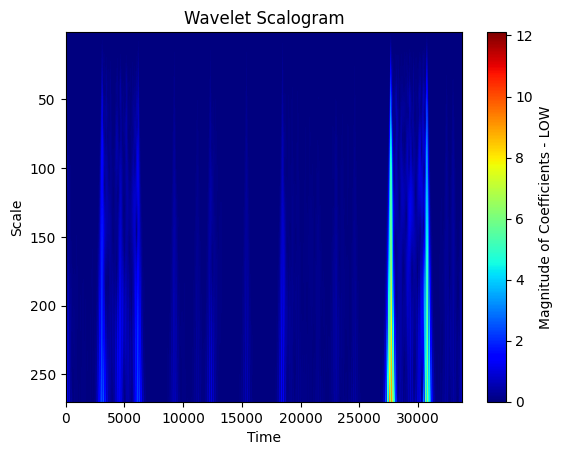

In [35]:
# Optionally, plot the scalogram (wavelet coefficients)
plt.imshow(np.abs(coefficients_low), aspect='auto', extent=[0, len(signal), scales[-1], scales[0]], cmap='jet')
plt.colorbar(label='Magnitude of Coefficients - LOW')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Wavelet Scalogram')
plt.show()


# To use all coefficients and frequencies obtained from CWT as features to train model

# Combined Data - LOW & HIGH

In [36]:
# combine low and high data
# combined_data = downsampled_low_data +downsampled_high_data
combined_data = pd.concat([downsampled_low_data ,downsampled_high_data],ignore_index=True )

display(combined_data)

,0,1,Label
0,-0.579450,0.491228,0
1,-0.579166,0.487778,0
2,-0.579166,0.482603,0
3,-0.579166,0.477428,0
4,-0.579166,0.471966,0
...,...,...,...
67579,-0.286586,-0.312035,1
67580,-0.286860,-0.312327,1
67581,-0.286860,-0.312327,1
67582,-0.286586,-0.312327,1


In [37]:
import pandas as pd
import pywt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example ML model
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import confusion matrix



# Assuming 'low' is the DataFrame containing the GSR signal and labels

# Function to extract wavelet coefficients and flatten them
def extract_wavelet_features(signal, scales, wavelet='morl'):
    # Perform Continuous Wavelet Transform
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet)
    
    # Flatten the coefficients matrix (num_scales x num_time_points) into a 1D array
    flat_coefficients = coefficients.flatten()
    
    return flat_coefficients

# Set the scales for wavelet transform
# scales = np.arange(1, 128)
scales = np.arange(1, 271)

# Prepare the feature matrix and labels
features = []
labels = []

# Iterate over each row in the dataset to extract features
for index, row in combined_data.iterrows():
    # Extract the signal from the first column (or both columns if necessary)
    signal = row[[0, 1]].values  # If you want to use both columns as the signal
    label = row['Label']
    
    
    # Extract the flattened wavelet features for the current signal
    wavelet_features = extract_wavelet_features(signal, scales)
    
    # Append the features and label to the respective lists
    features.append(wavelet_features)
    labels.append(label)

# Convert the features and labels into NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest Classifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Optional: Print a classification report for additional metrics (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 98.05%
Confusion Matrix:
[[6540  132]
 [ 131 6714]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6672
         1.0       0.98      0.98      0.98      6845

    accuracy                           0.98     13517
   macro avg       0.98      0.98      0.98     13517
weighted avg       0.98      0.98      0.98     13517

